In [139]:
import numpy as np
import pandas as pd
import os
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.manifold import TSNE
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [54]:
pd.set_option('display.max_columns', None)

In [55]:
df = pd.read_excel(r'C:\Users\Rohit Varre\Desktop\MliS\ML lab\Assignment 2\trainDataset.xls')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 120 entries, ID to original_ngtdm_Strength
dtypes: float64(108), int64(11), object(1)
memory usage: 375.1+ KB


In [57]:
df.iloc[:,:13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             400 non-null    object 
 1   pCR (outcome)                  400 non-null    int64  
 2   RelapseFreeSurvival (outcome)  400 non-null    float64
 3   Age                            400 non-null    float64
 4   ER                             400 non-null    int64  
 5   PgR                            400 non-null    int64  
 6   HER2                           400 non-null    int64  
 7   TrippleNegative                400 non-null    int64  
 8   ChemoGrade                     400 non-null    int64  
 9   Proliferation                  400 non-null    int64  
 10  HistologyType                  400 non-null    int64  
 11  LNStatus                       400 non-null    int64  
 12  TumourStage                    400 non-null    int

In [58]:
df.drop(['pCR (outcome)'],axis = 1, inplace = True)
cols = list(df.columns)
cols[2],cols[11] = cols[11],cols[2]
temp = cols[1]
cols.remove(temp)
cols.append(temp)
df = df[cols]

In [59]:
null = []
for i in df.columns:
    if 999 in df[i].unique():
        check = df[i].value_counts()[999]
        print(i,check)
        null.append(i)

PgR 1
HER2 1
TrippleNegative 1
ChemoGrade 3
Proliferation 2
HistologyType 3
LNStatus 1


In [60]:
for i in null:
    df[i].replace(999,df[i].mode()[0],inplace = True)
df.describe()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,RelapseFreeSurvival (outcome)
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,4.000000e+02,400.000000,400.000000,400.000000,40

In [61]:
df.head()

,ID,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,RelapseFreeSurvival (outcome)
0,TRG002174,2,0,0,0,1,3,3,1,1,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,

In [62]:
y = pd.DataFrame(df['RelapseFreeSurvival (outcome)'])
X = df.drop(['RelapseFreeSurvival (outcome)','ID'],axis = 1)
X.head()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,2,0,0,0,1,3,3,1,1,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.4078

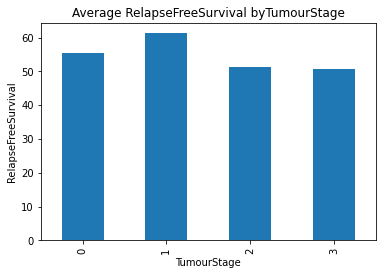

   TumourStage  RelapseFreeSurvival (outcome)
0            1                      55.452381
1            2                      61.232456
2            3                      51.190000
3            4                      50.708333


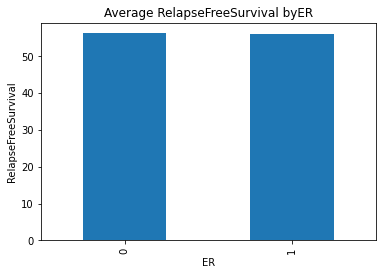

   ER  RelapseFreeSurvival (outcome)
0   0                      56.231431
1   1                      56.098765


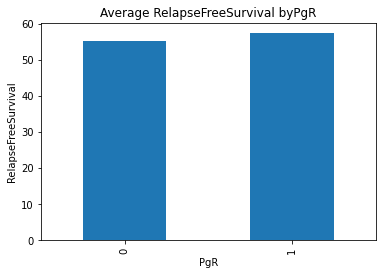

   PgR  RelapseFreeSurvival (outcome)
0    0                      55.341702
1    1                      57.374224


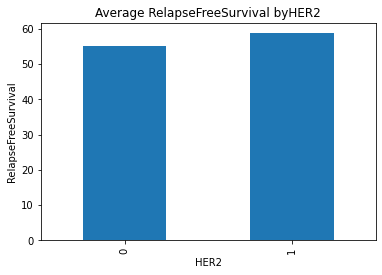

   HER2  RelapseFreeSurvival (outcome)
0     0                      54.998182
1     1                      58.715333


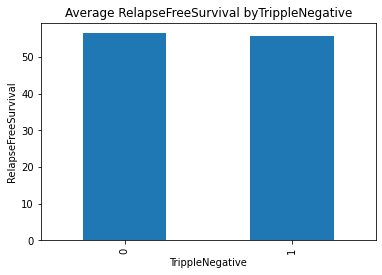

   TrippleNegative  RelapseFreeSurvival (outcome)
0                0                      56.418539
1                1                      55.640351


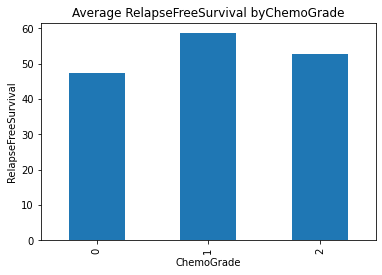

   ChemoGrade  RelapseFreeSurvival (outcome)
0           1                      47.333333
1           2                      58.578723
2           3                      52.780675


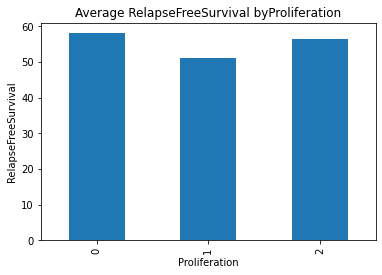

   Proliferation  RelapseFreeSurvival (outcome)
0              1                      58.039548
1              2                      51.194444
2              3                      56.415493


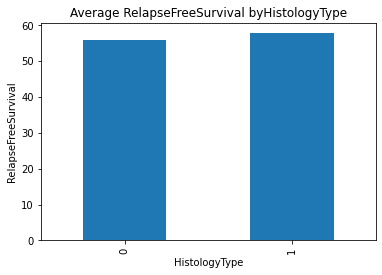

   HistologyType  RelapseFreeSurvival (outcome)
0              1                      55.894380
1              2                      57.790179


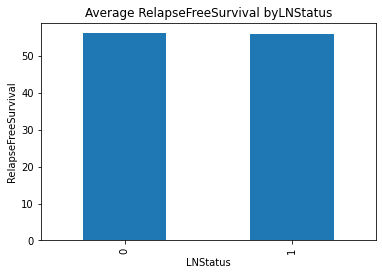

   LNStatus  RelapseFreeSurvival (outcome)
0         0                      56.188802
1         1                      56.133013


In [63]:
check = pd.DataFrame
for i,col in enumerate(df.columns[1:10]):
    check = df.groupby(col,as_index=False)['RelapseFreeSurvival (outcome)'].mean()
    check['RelapseFreeSurvival (outcome)'].plot(kind='bar')
    plt.title('Average RelapseFreeSurvival by' + col)
    plt.xlabel(col)
    plt.ylabel("RelapseFreeSurvival")
    plt.show()
    print(check)

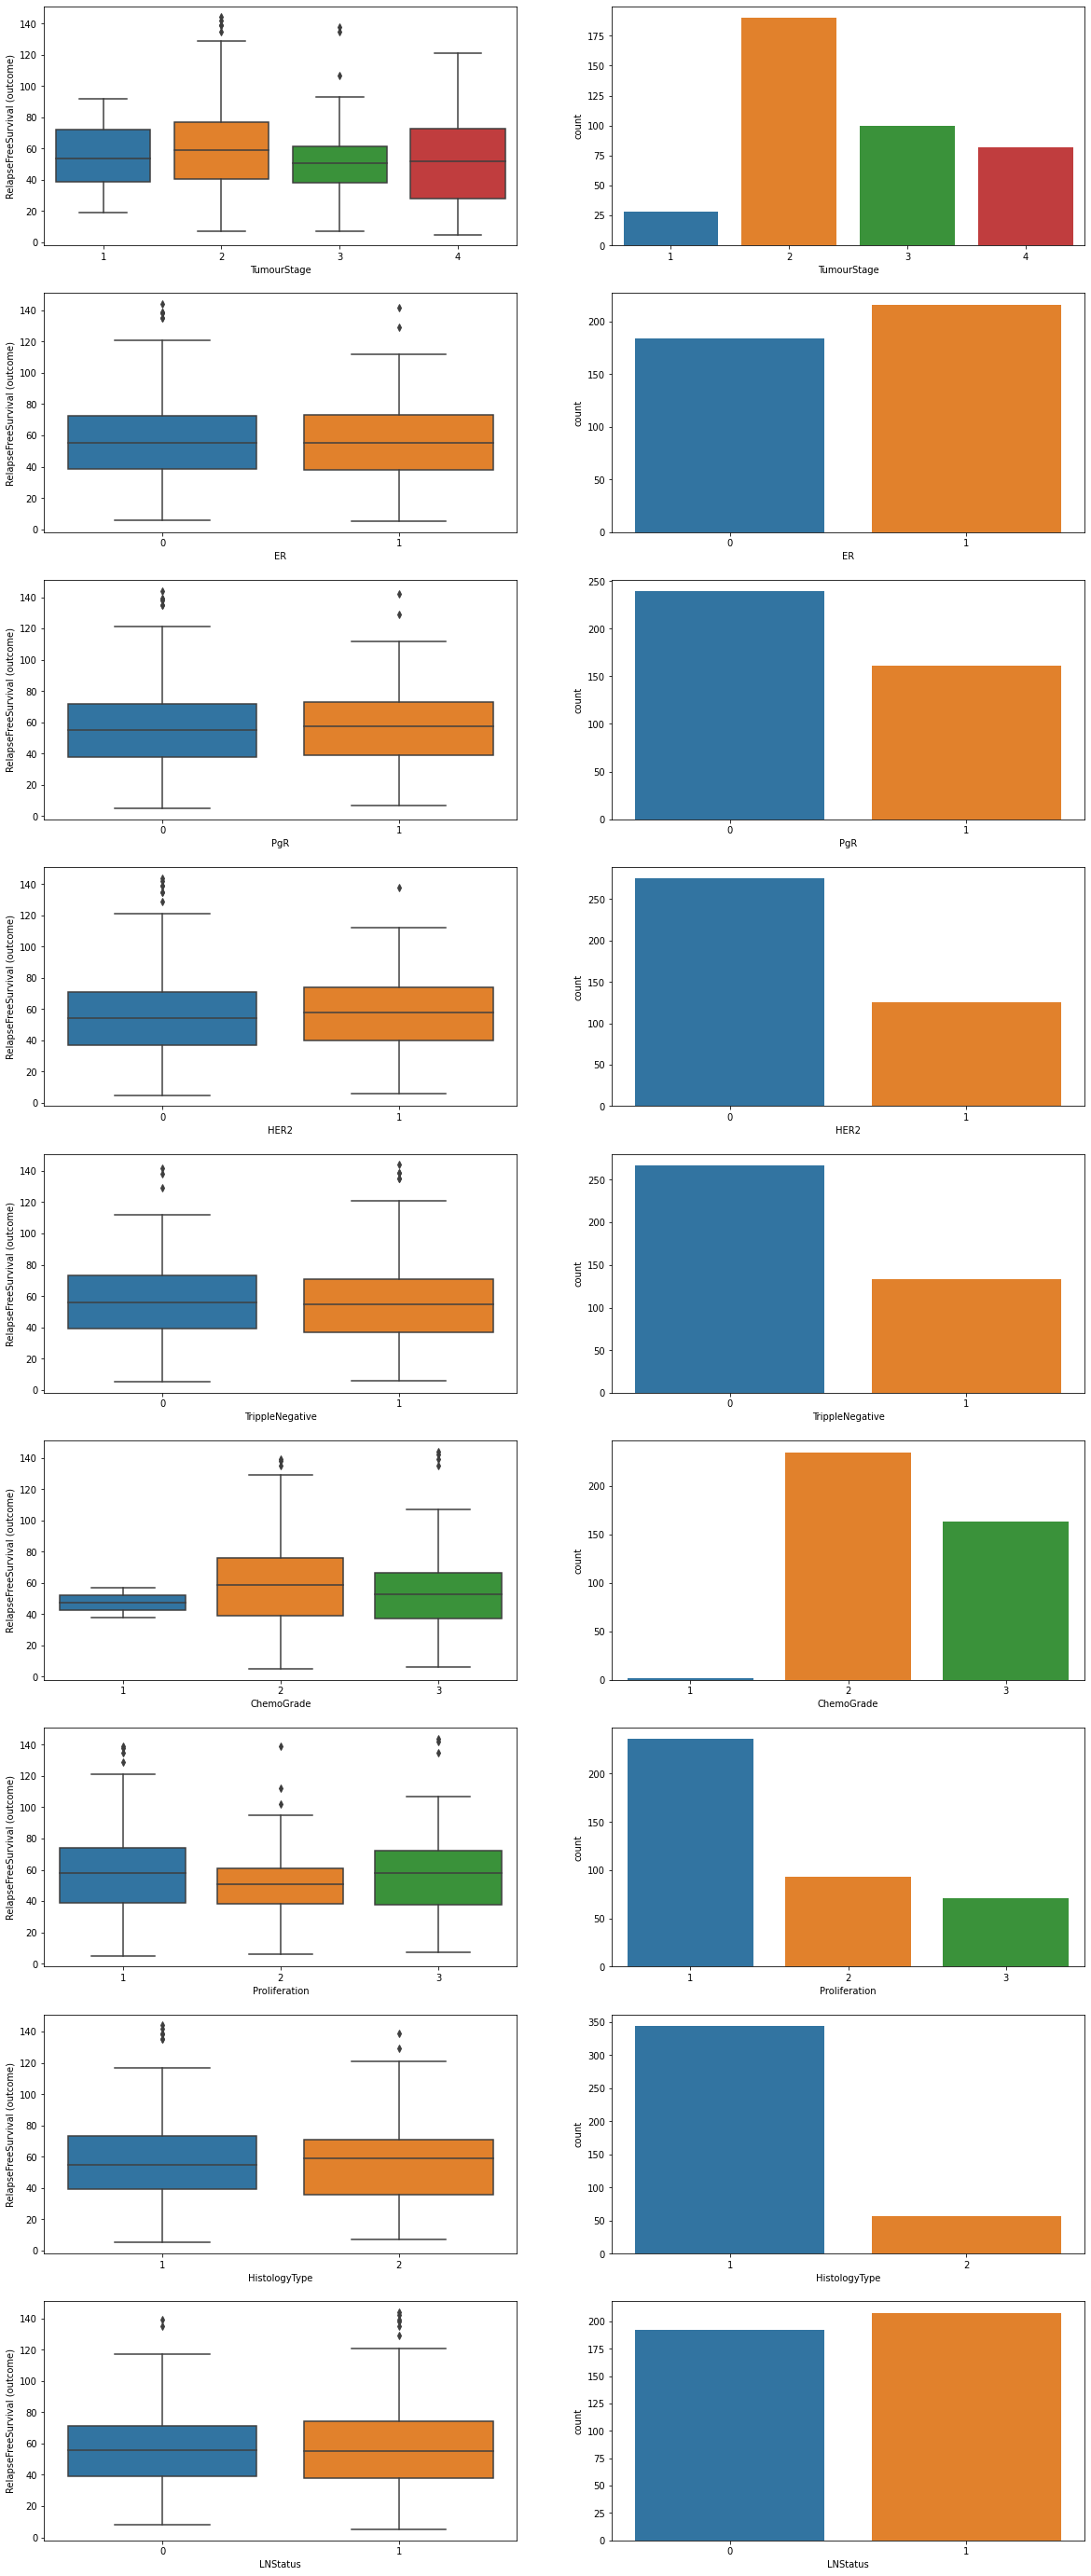

In [66]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(20,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
for i, col in enumerate(df.columns[1:10]):
    sns.boxplot(y='RelapseFreeSurvival (outcome)', x=col, data = df, ax=axes[i][0])
    sns.countplot(x=col, data = df, ax=axes[i][1])

In [39]:
# fig, ax = plt.subplots(nrows=20, ncols=6, figsize=(300,560))
# fig.subplots_adjust(hspace =.2, wspace=.2)
# ax = ax.ravel()
# for i, col in enumerate(X.columns[1:]):
#     ax[i].plot(X[col],y,'or',markersize = 15)

In [67]:
corrMat_kendall = df.iloc[:,10:].corr(method = 'kendall')
corrMat_kendall = pd.DataFrame(corrMat_kendall)
corrMat_kendall.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr_kendall = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr_kendall.reset_index(inplace=True)
corr_kendall.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


In [68]:
kendall_sig = corr_kendall[(corr_kendall['RelapseFreeSurvival (outcome)']>0.05) | (corr_kendall['RelapseFreeSurvival (outcome)']<-0.05)]
kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
kendall_sig.head()

<ipython-input-68-43f24d347939>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


In [71]:
corrMatt = df.iloc[:,10:].corr()
corrMat = pd.DataFrame(corrMatt)
corrMat.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr = corrMat['RelapseFreeSurvival (outcome)']
corr = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr.reset_index(inplace=True)
corr.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


In [72]:
corr_sig = corr[(corr['RelapseFreeSurvival (outcome)']>0.05) | (corr['RelapseFreeSurvival (outcome)']<-0.05)]
corr_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
corr_sig.head()

<ipython-input-72-30371137a452>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


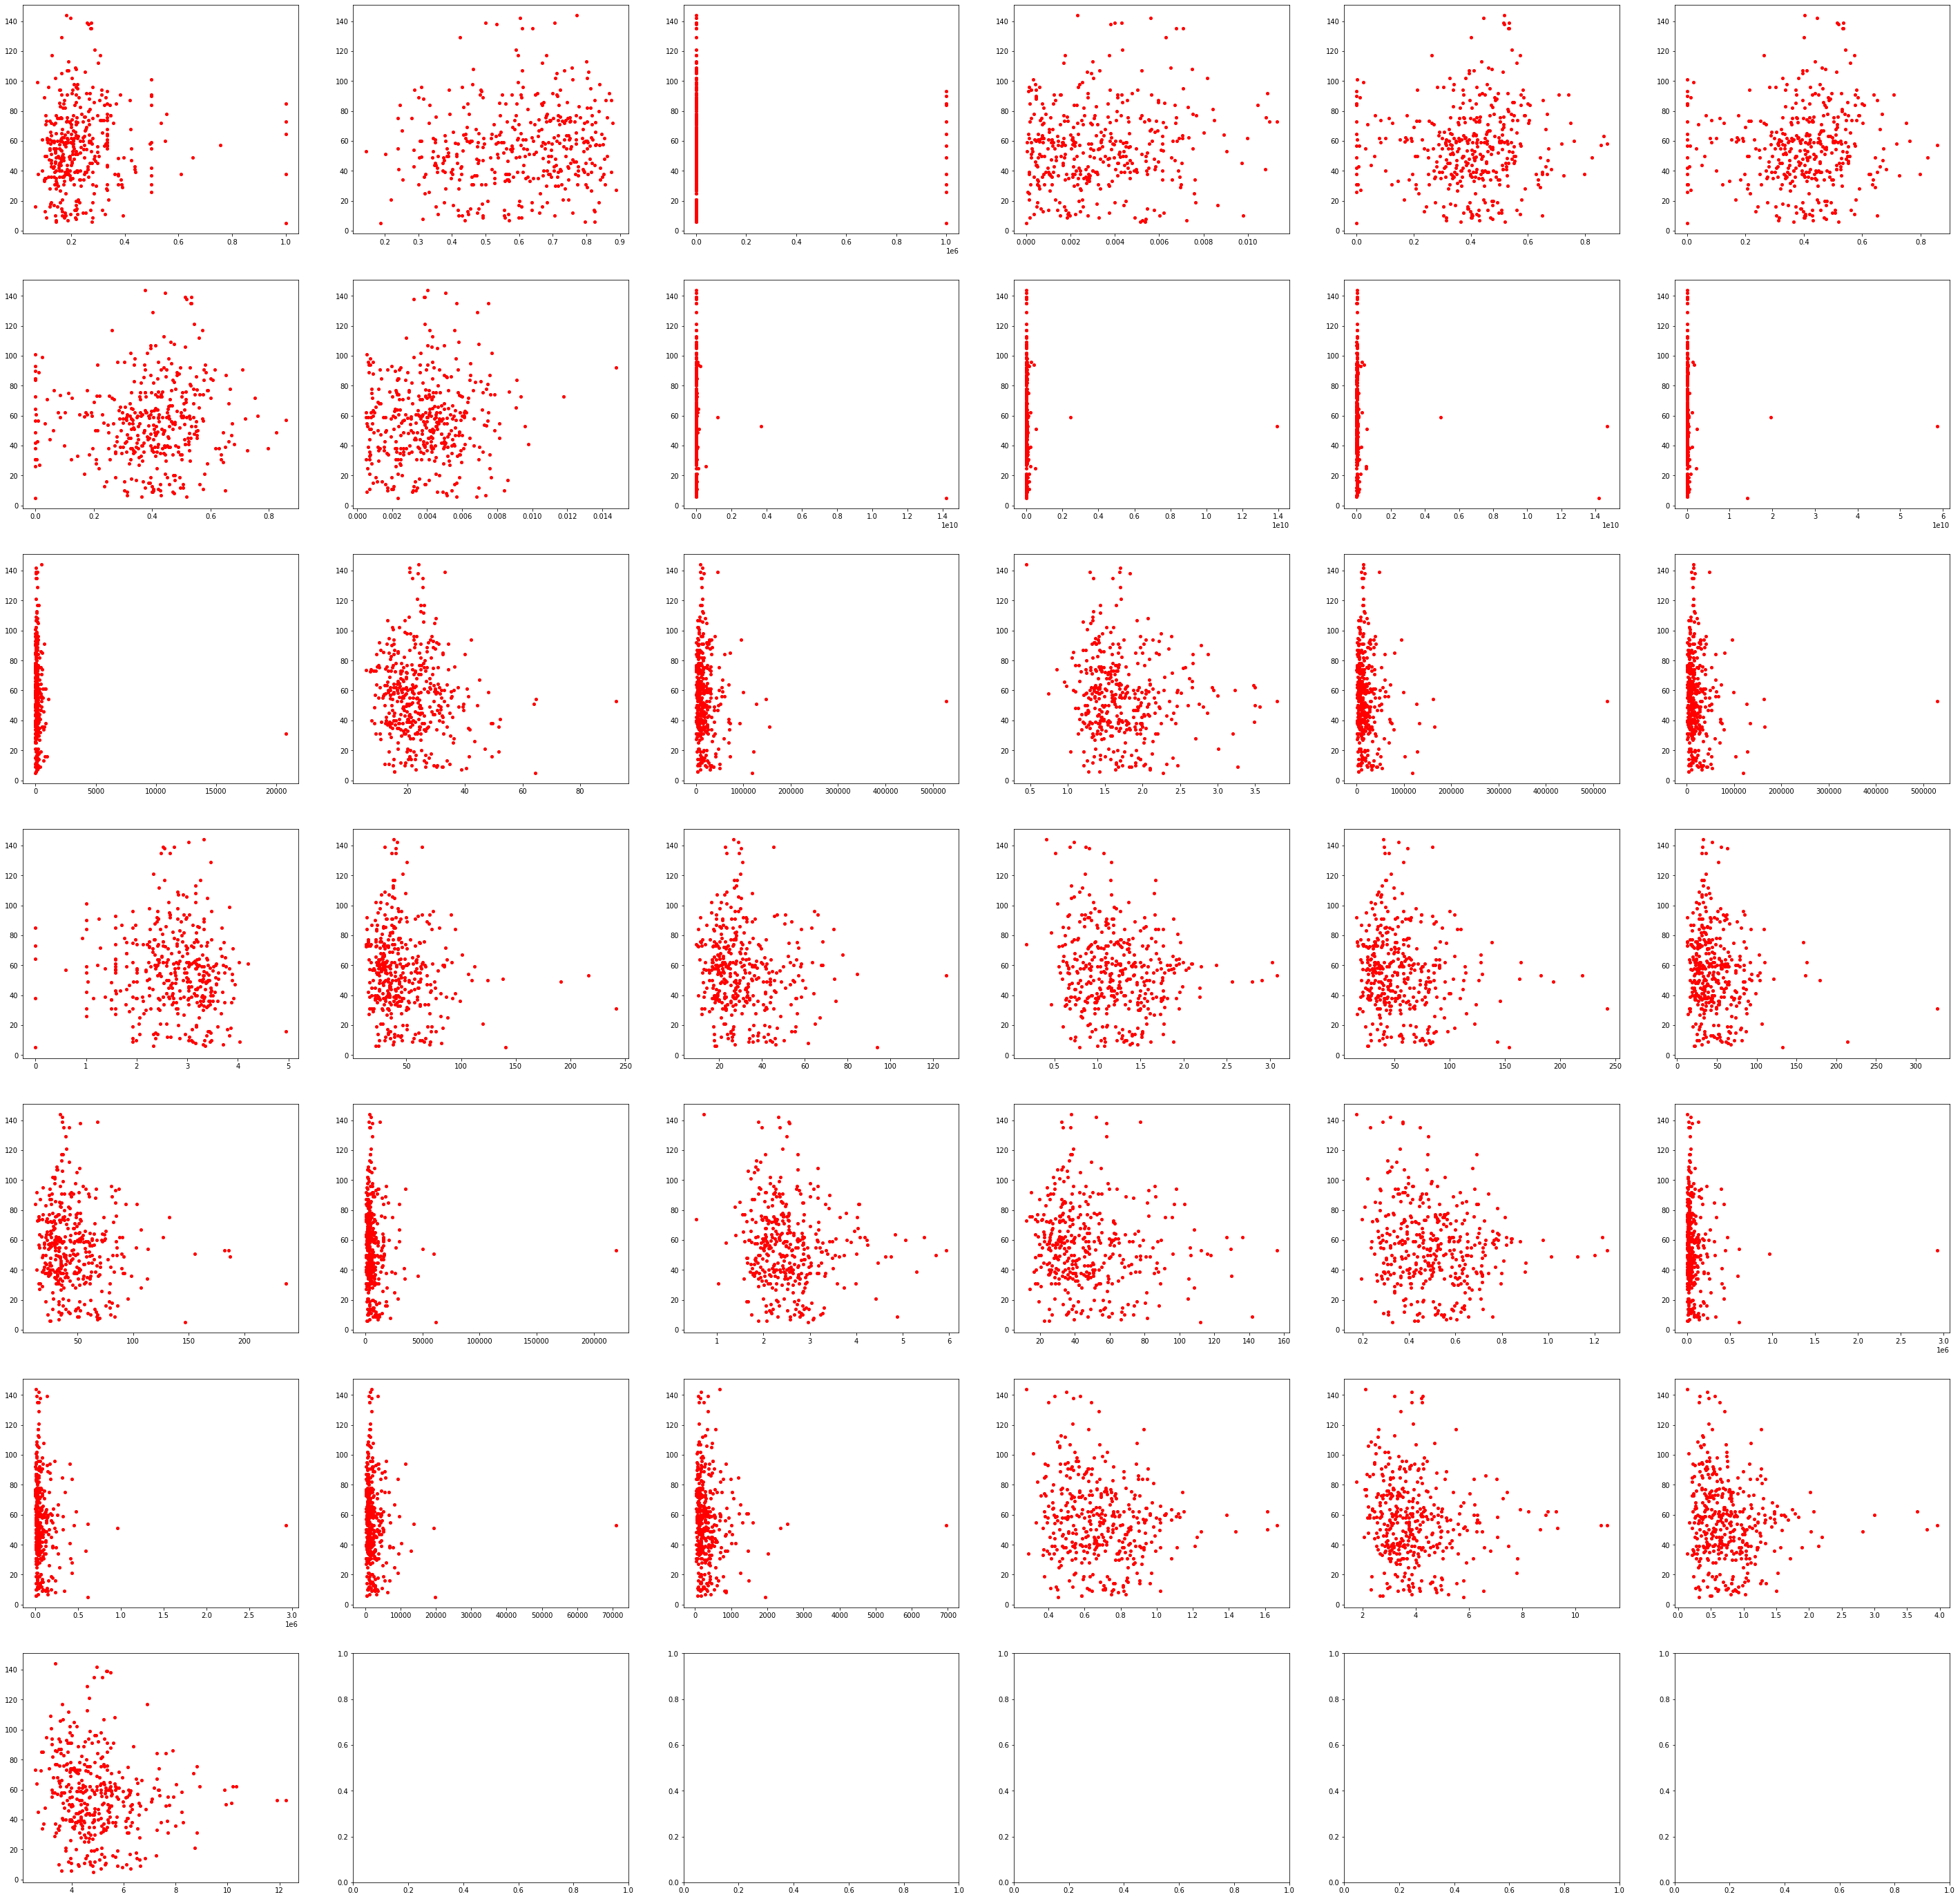

In [74]:
fig, ax = plt.subplots(nrows=len(kendall_sig['index'])//6 + 1, ncols=6, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(kendall_sig['index'][1:]):
    ax[i].plot(X[col],y,'or',markersize = 4)

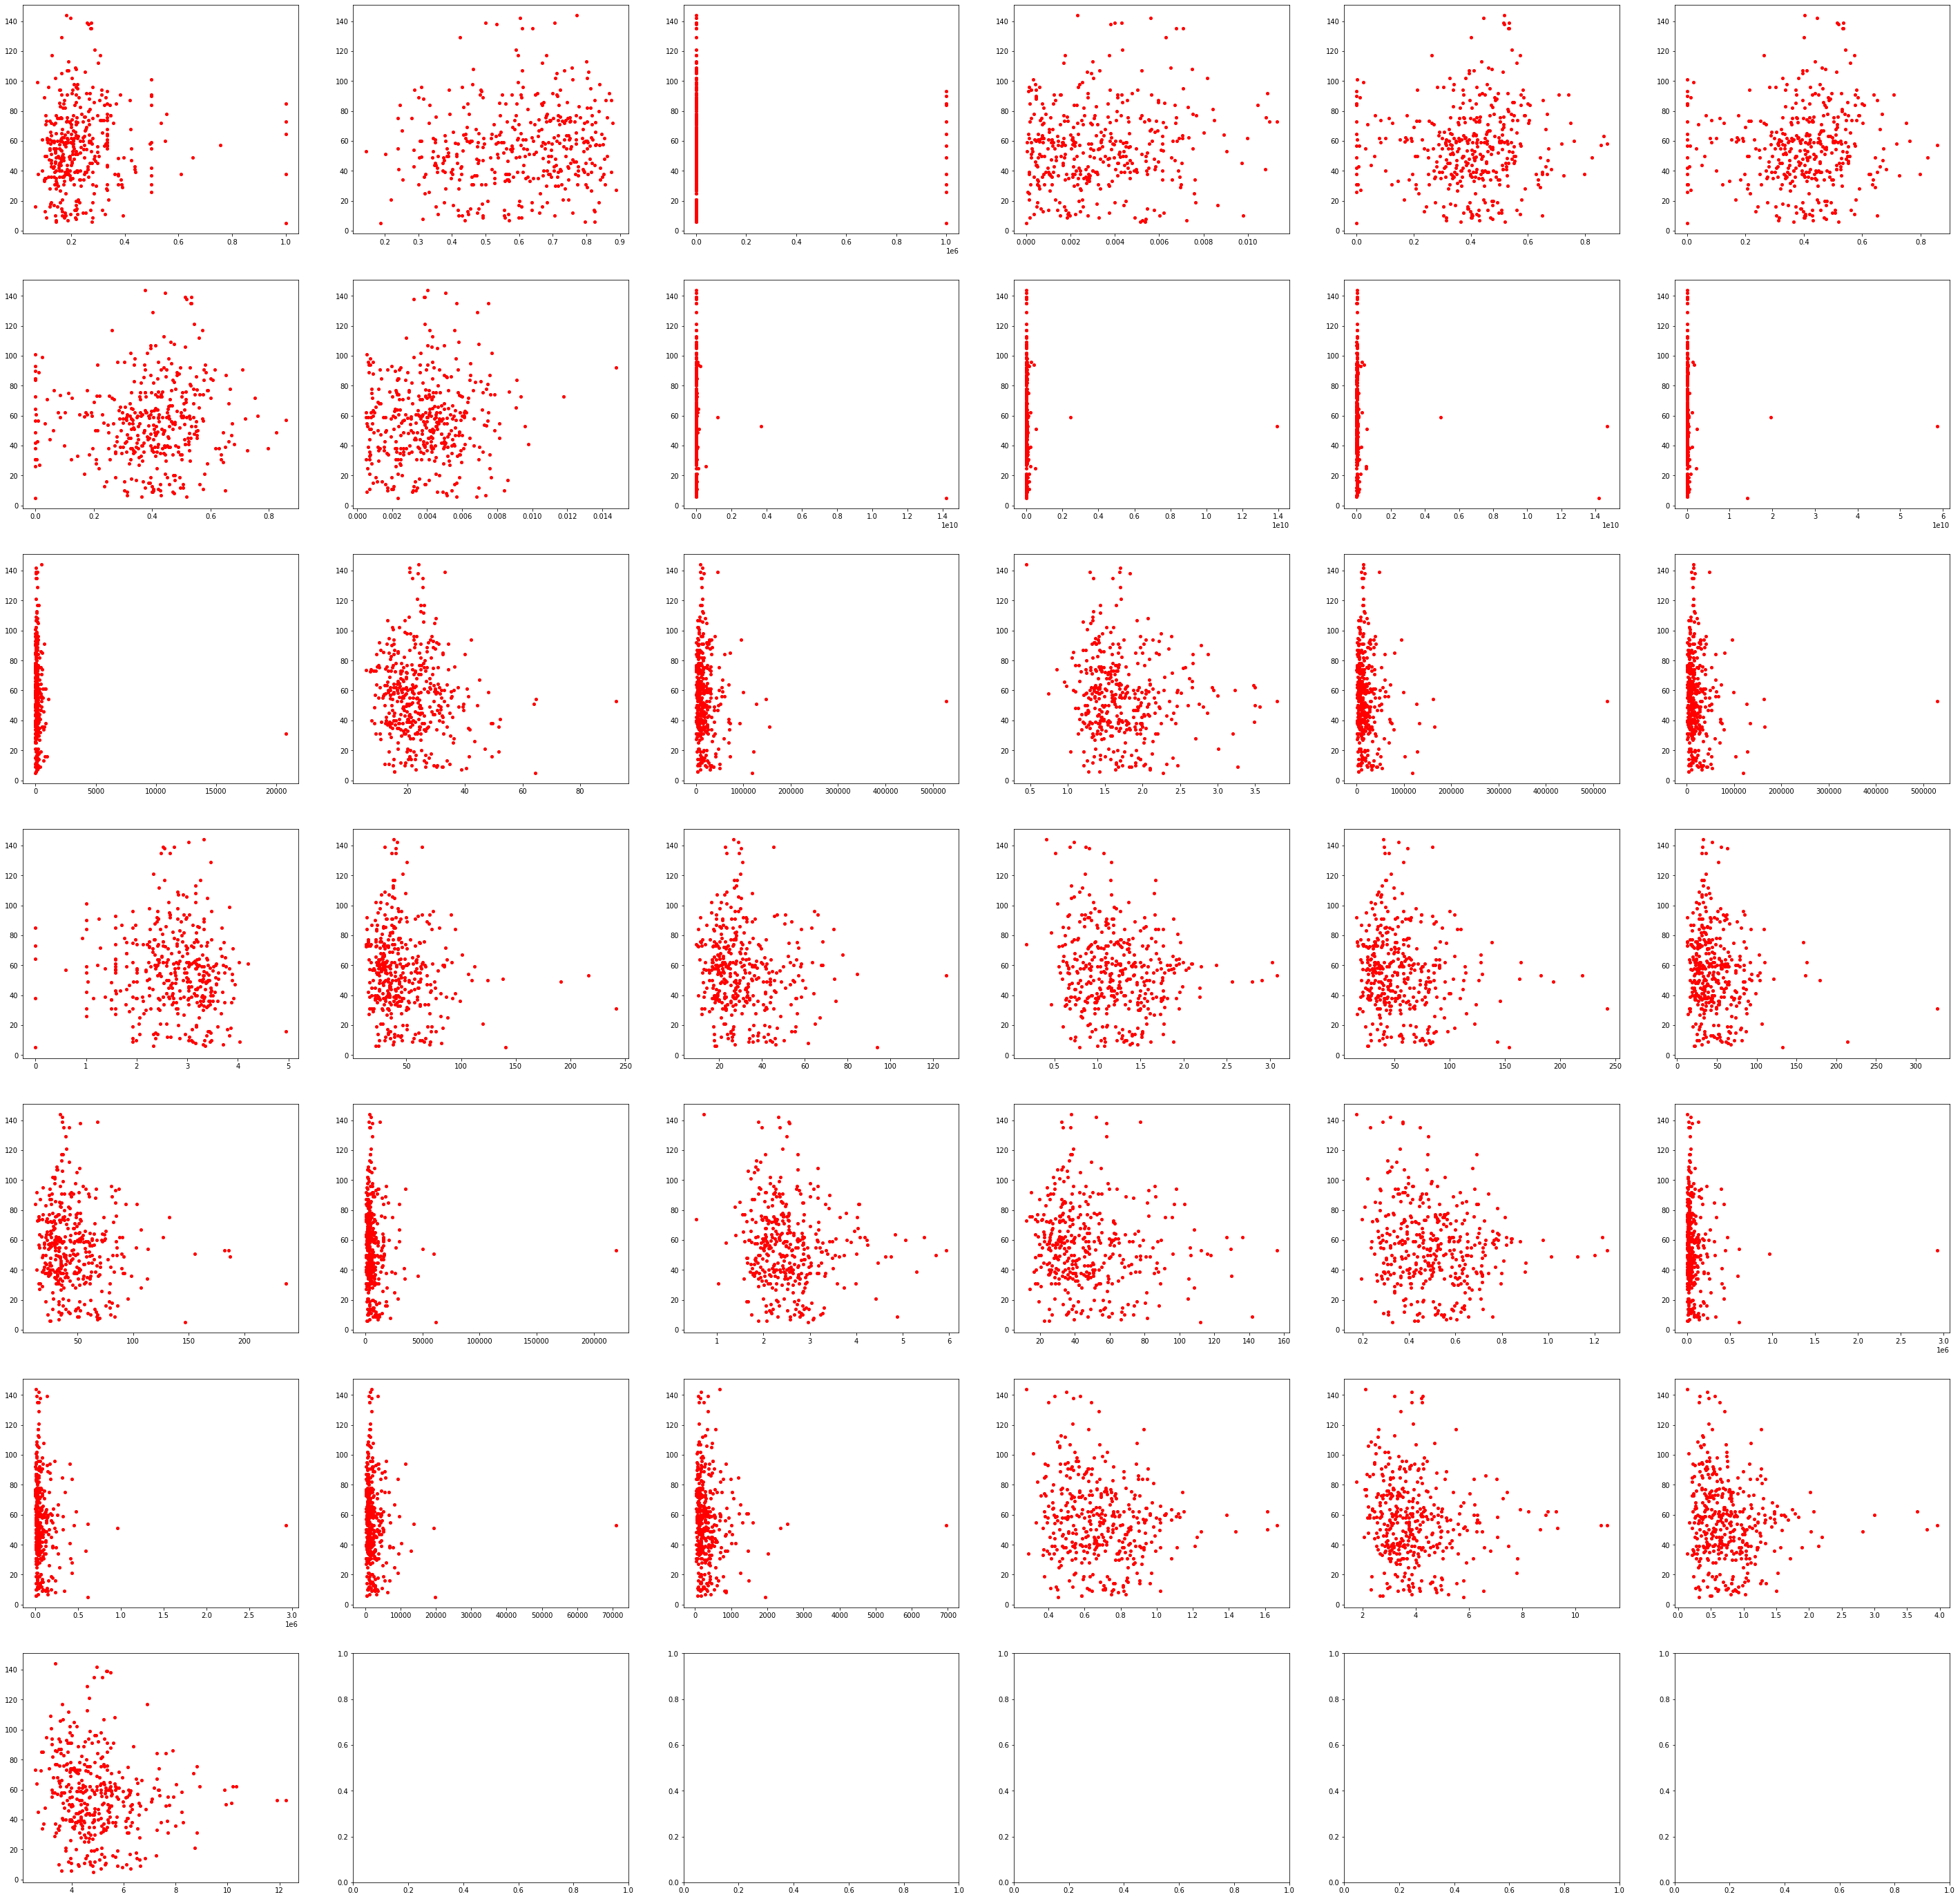

In [75]:
fig, ax = plt.subplots(nrows=len(corr_sig['index'])//6 + 1, ncols=6, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(corr_sig['index'][1:]):
    ax[i].plot(X[col],y,'or',markersize = 4)

In [76]:
y = pd.DataFrame(df['RelapseFreeSurvival (outcome)'])
X = df.drop(['RelapseFreeSurvival (outcome)','ID'],axis = 1)
X.head()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,2,0,0,0,1,3,3,1,1,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.4078

In [79]:
X_img = X.iloc[:,10:]
X_img.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.407895,0.184265,0.685680,0.149585,0.907867,0.907867,0.963147,0.938578,-0.149786,0.425720,0.184265,1.806982,0.538903,1.3

In [80]:
from sklearn.manifold import TSNE
X_img = TSNE(n_components=30,method='exact').fit_transform(X_img)
print(X.shape,y.shape)

C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(400, 117) (400, 1)


In [81]:
X_img = pd.DataFrame(X_img)
X_img.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.045291,-0.024504,0.002583,-0.035741,-0.031892,0.065070,-0.000249,-0.049665,-0.072651,0.027393,0.049714,0.007576,-0.065563,0.138487,-0.112713,-0.089497,0.036862,-0.331364,-0.193520,0.004341,-0.039929,0.110890,-0.190704,-0.005652,0.258105,0.119156,0.006005,-0.008516,0.282540,0.129058
std,1.652366,1.789192,1.891594,1.818630,1.302959,1.988960,1.475803,1.938944,1.947222,2.112194,2.070640,2.184887,1.387295,2.653508,3.445491,2.741764,1.729813,5.484007,4.599025,11.343903,1.711498,1.907221,3.464211,1.318765,5.254457,4.201507,1.874317,2.436073,3.769611,3.427385
min,-4.596241,-17.766495,-11.090346,-21.253237,-5.205060,-10.673568,-8.109674,-12.760495,-26.531919,-10.199105,-10.048801,-9.785775,-6.250963,-4.331063,-54.699406,-46.227631,-7.573958,-101.978958,-85.957558,-149.326889,-19.272547,-5.551164,-48.811291,-4.851169,-7.465934,-7.989743,-22.867727,-31.169178,-6.492967,-14.514004
25%,-1.059904,-0.621750,-0.541878,-0.836976,-0.644332,-0.809267,-0.563291,-1.072041,-0.646980,-0.999163,-0.871247,-1.451094,-0.616771,-0.627901,-1.380462,-0.698326,-0.667322,-0.872845,-0.580790,-1.653826,-0.690415,-0.763993,-1.010807,-0.572782,-1.069939,-1.063612,-0.658460,-1.218729,-0.652449,-1.232065
50%,-0.091276,-0.015611,0.103702,-0.021036,-0.045763,-0.030488,-0.017973,0.039460,-0.014913,0.010307,0.015166,-0.022424,0.022421,-0.057500,0.077787,0.040541,-0.002109,0.054652,-0.003972,0.166389,-0.134760,0.022006,-0.015140,-0.042463,-0.021348,0.133206,0.026503,-0.056665,-0.008335,0.096173
75%,1.011904,0.529134,0.752515,0.796453,0.708901,0.876596,0.674473,1.022178,0.746132,1.073024,1.125313,1.286673,0.708999,0.523711,1.477980,0.692568,0.799584,0.942444,0.643183,1.476425,0.625604,0.844753,0.998061,0.646841,0.950220,1.173368,0.677520,1.174937,0.676517,1.053406
max,9.576048,17.614136,22.506338,6.514184,3.960227,22.920614,9.800731,7.820577,6.047195,21.158188,22.616478,13.819635,2.866236,46.142906,12.452919,8.121380,12.349837,5.453746,12.050807,164.442154,8.543399,11.933077,23.229748,4.227118,95.376991,74.903244,11.184363,11.974624,56.819157,51.187370


In [82]:
X_img.insert(0,'RelapseFreeSurvival (outcome)',df['RelapseFreeSurvival (outcome)'])
X_img.head()

,RelapseFreeSurvival (outcome),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,144.0,-2.717864,0.560659,2.317685,0.331139,-2.473593,0.317562,-0.288952,0.464709,3.499244,-0.474357,3.199391,-3.266534,1.644361,0.335295,1.609849,-1.587197,0.944210,3.379156,0.202700,0.970012,-1.065335,-0.491302,2.737397,0.998567,-1.549542,1.433215,0.763011,-1.262973,-0.837103,-0.325659
1,142.0,-1.928250,0.097067,0.451409,-1.482851,-3.419270,-2.096366,0.094168,-1.144567,-1.518746,-2.284516,1.019119,-1.244585,1.385860,-0.562860,1.506823,-0.946217,1.814950,0.572802,1.265148,-0.517058,-0.217760,1.233646,3.038273,-0.441227,-3.057053,0.393522,-2.152215,-1.142730,0.128436,-2.839857
2,135.0,-0.182070,-0.404388,-3.205322,-1.196860,0.117794,-2.084833,-0.539041,0.062166,0.775950,-1.424992,-0.007036,1.457208,0.579456,0.084064,0.436213,-0.165883,0.130178,0.052012,0.181451,-1.587060,-1.182974,0.710046,1.239940,0.040243,-0.051823,-4.902691,-0.146372,-1.612285,0.144807,-3.099809
3,12.0,1.826149,0.572434,0.412568,1.749591,0.439808,1.562832,0.292836,2.404100,6.047195,1.742123,0.559021,-0.762381,1.109983,1.397418,0.523228,1.723943,0.485934,1.001433,1.871530,1.411196,-2.638143,0.112435,0.055661,-0.284637,-4.132576,0.471681,0.355882,0.120073,-0.614284,2.214560
4,109.0,-0.676093,1.813382,0.317775,-0.858554,-0.109222,-3.554484,0.756823,1.351722,0.352090,-1.278706,0.561433,2.503152,0.714690,-0.318755,-0.375927,-2.816519,-2.249747,-0.320273,2.035158,-1.818645,-2.745503,-0.901569,0.036384,0.239501,0.476298,-0.557191,-0.956500,-0.182667,-0.446697,-2.434552


In [83]:
corrMat_kendall = X_img.corr(method = 'kendall')
corrMat_kendall = pd.DataFrame(corrMat_kendall)
corrMat_kendall.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr_kendall = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr_kendall.reset_index(inplace=True)
corr_kendall.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,5,0.061040
2,0,0.056132
3,7,0.045031
4,3,0.045031


In [84]:
kendall_sig = corr_kendall[(corr_kendall['RelapseFreeSurvival (outcome)']>0.01) | (corr_kendall['RelapseFreeSurvival (outcome)']<-0.02)]
kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
kendall_sig.head()

<ipython-input-84-1e5146a37883>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,5,0.061040
2,0,0.056132
3,7,0.045031
4,3,0.045031


In [85]:
len(kendall_sig)

20

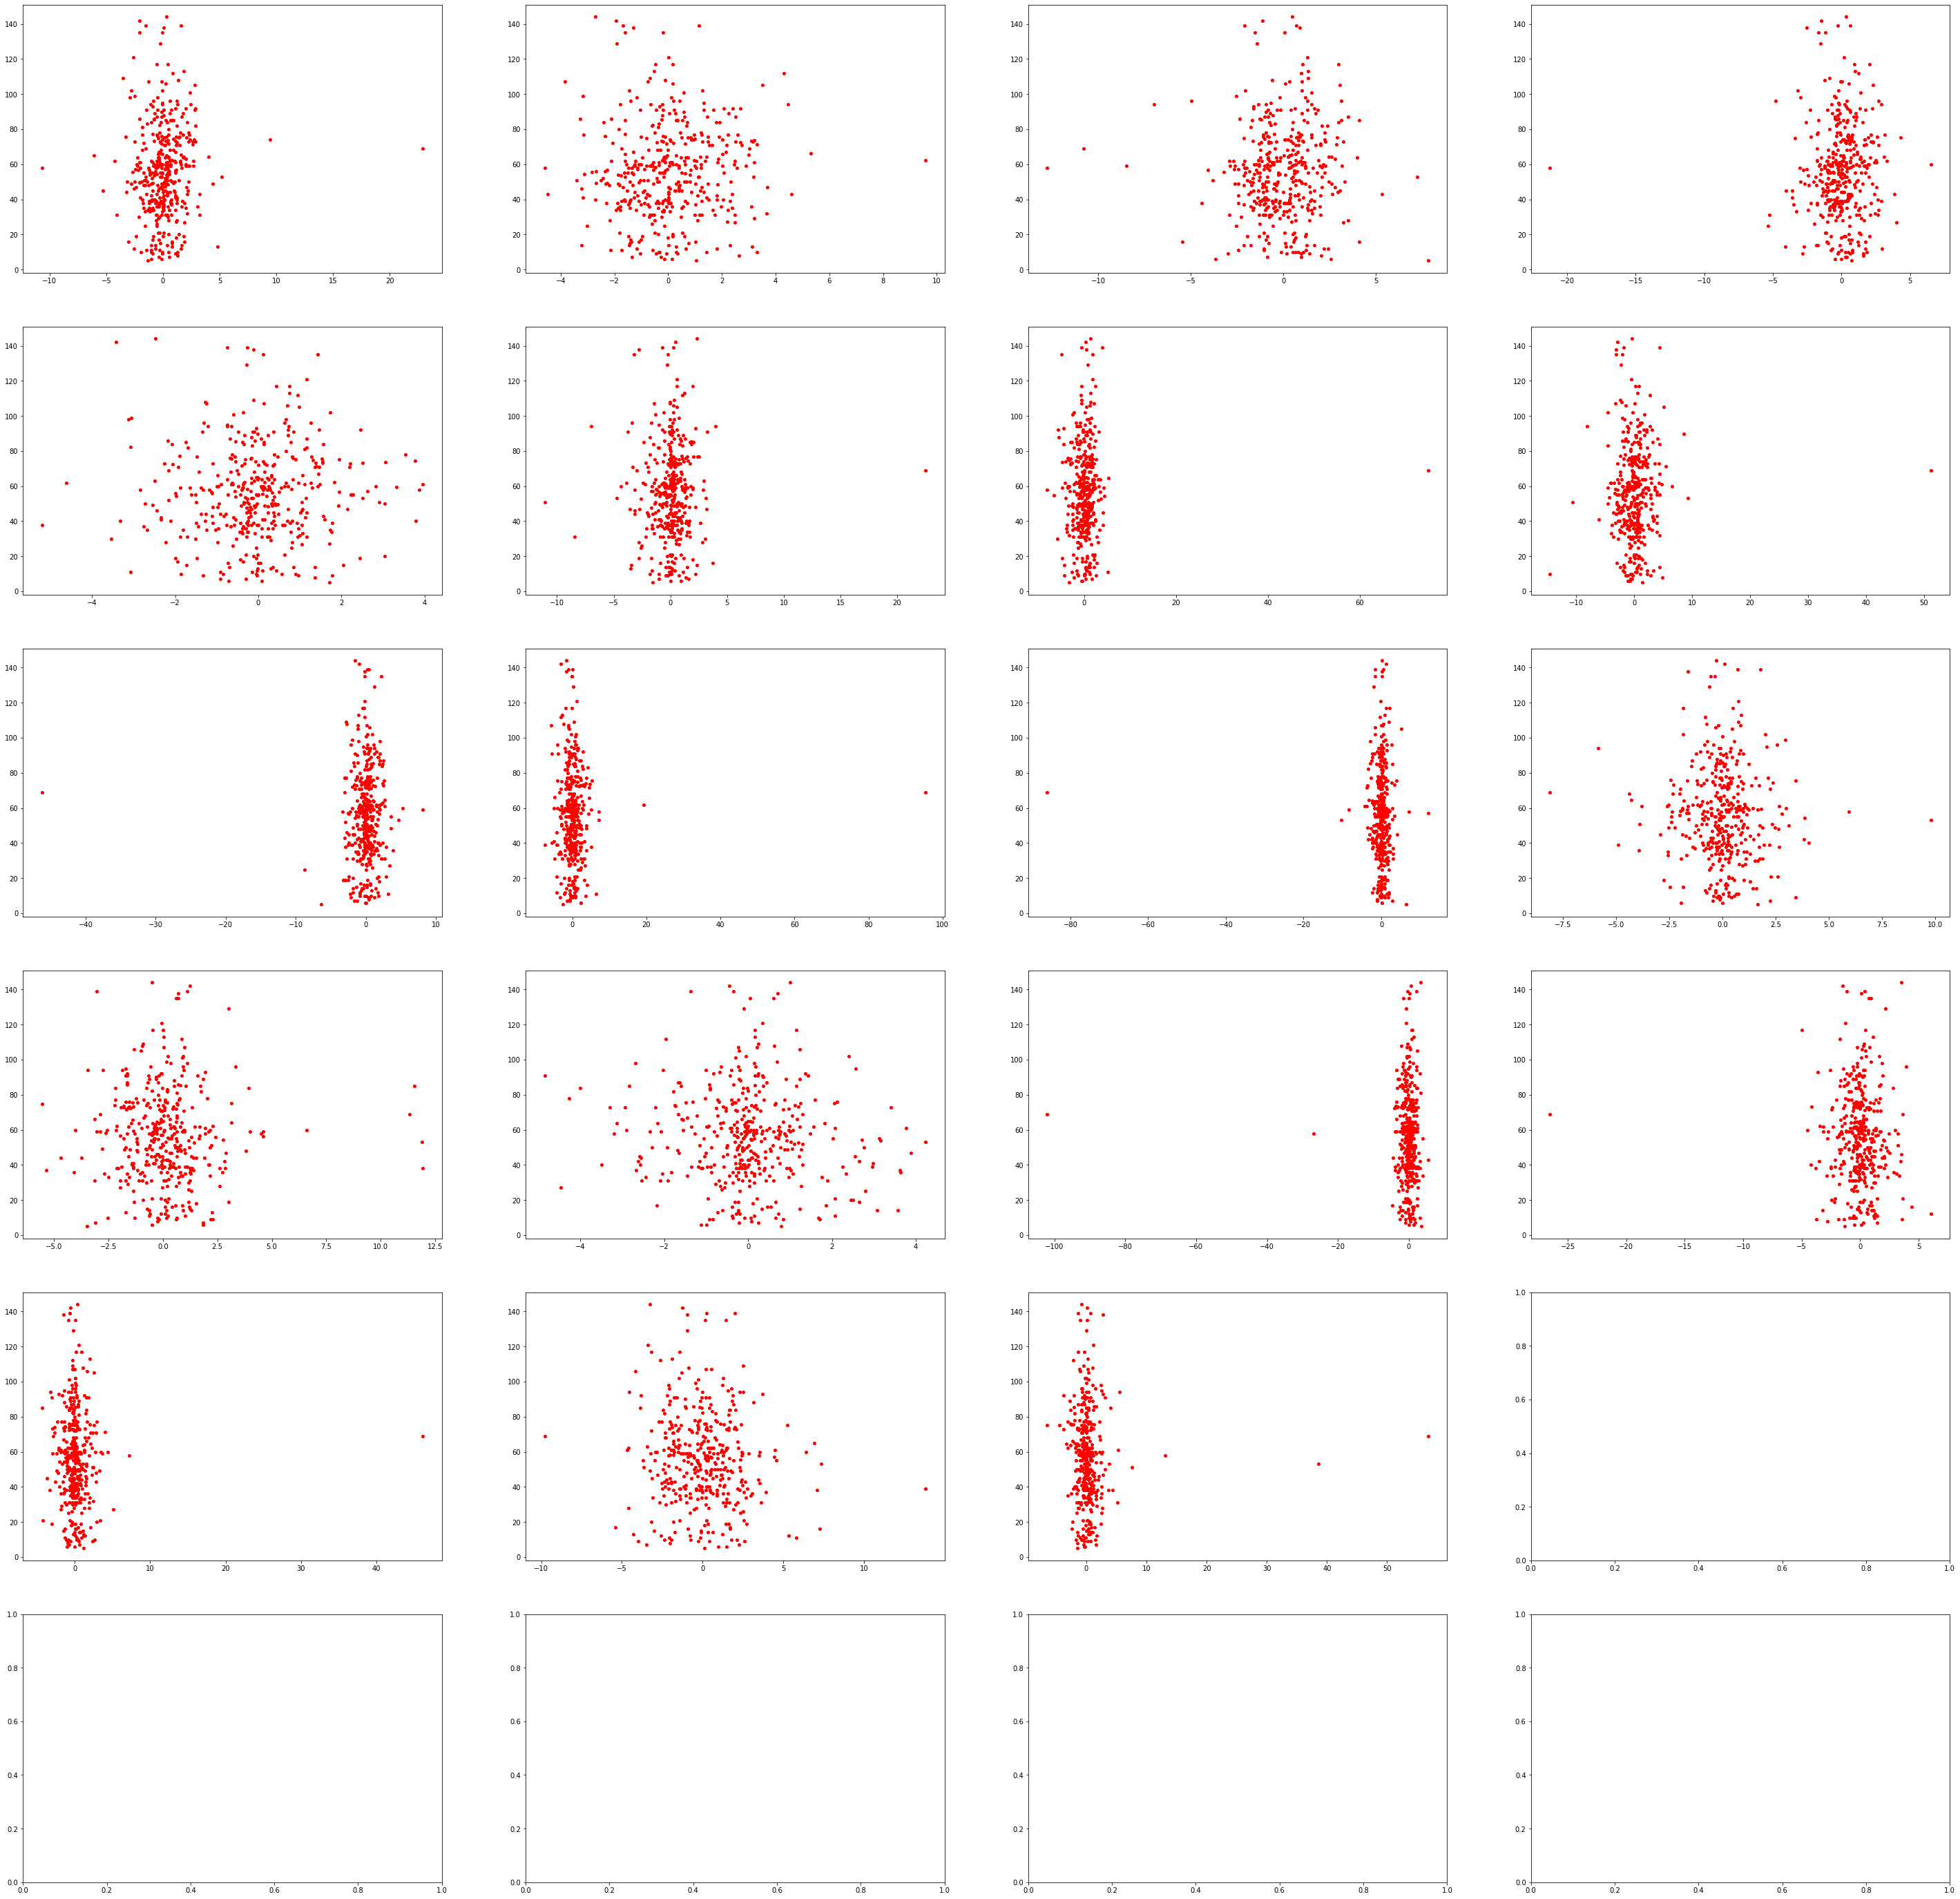

In [86]:
fig, ax = plt.subplots(nrows=len(kendall_sig['index'])//4+1, ncols=4, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(kendall_sig['index'][1:]):
    ax[i].plot(X_img[col],X_img['RelapseFreeSurvival (outcome)'],'or',markersize = 4)

In [87]:
X.head()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,2,0,0,0,1,3,3,1,1,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.4078

In [88]:
# X = np.array(X.iloc[:,1:])
# y = np.array(y)
# print(X.shape,y.shape)

In [263]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [264]:
print(x_train.shape,y_train.shape)

(320, 117) (320, 1)


In [265]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 20],
    'max_features': [100, 117],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [10, 20],
    'n_estimators': [500,600, 700,]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
rf = grid_search.best_estimator_
rf_pred = rf.predict(x_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, rf_pred)
print(mae)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True, 'max_depth': 5, 'max_features': 117, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 700}
21.62414308049147


In [266]:
rf = RandomForestRegressor(n_estimators = 600, max_depth = 5, min_samples_leaf = 10, min_samples_split = 10)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, rf_pred)
print(mae)

<ipython-input-266-64d5ec61699b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


21.492544037321046


In [272]:
feature_list = list(x_train.columns)

In [273]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(x_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feat_import = pd.DataFrame(feature_importances)
feat_import.head(10)

,0,1
0,original_firstorder_Range,0.099796
1,original_firstorder_Kurtosis,0.073500
2,original_firstorder_Variance,0.044930
3,original_firstorder_90Percentile,0.041581
4,original_glszm_SizeZoneNonUniformity,0.037566
5,original_glszm_ZonePercentage,0.030034
6,original_glrlm_ShortRunHighGrayLevelEmphasis,0.022460
7,original_firstorder_InterquartileRange,0.022224
8,original_firstorder_MeanAbsoluteDeviation,0.021568
9,original_shape_Elongation,0.021172


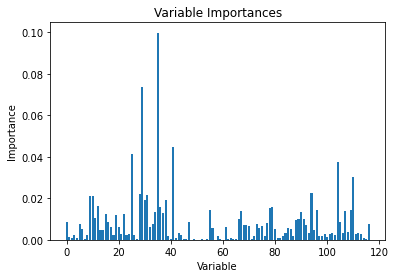

In [274]:
import matplotlib.pyplot as plt
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [275]:
from sklearn.metrics import mean_absolute_error 
prediction = rf.predict(x_test)
mae = mean_absolute_error(y_test, prediction)
print(mae)

21.492544037321046


In [276]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(X)
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x_scaled)
print(x.shape)

(400, 117)


In [277]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [278]:
x_test.shape

(80, 117)

In [279]:
model = Sequential([
    
    Dense(units = 240, input_shape = (117,), activation = 'relu'),
    Dropout(0.2),
    Dense(units = 480, activation = 'relu'),
    Dense(units = 480, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)),
    Dense(units = 240, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(units = 120, activation = 'relu'),
    Dense(units = 1, activation = 'relu'),
    
])
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 240)               28320     
_________________________________________________________________
dropout_40 (Dropout)         (None, 240)               0         
_________________________________________________________________
dense_159 (Dense)            (None, 480)               115680    
_________________________________________________________________
dense_160 (Dense)            (None, 480)               230880    
_________________________________________________________________
dense_161 (Dense)            (None, 240)               115440    
_________________________________________________________________
dropout_41 (Dropout)         (None, 240)               0         
_________________________________________________________________
dense_162 (Dense)            (None, 120)             

In [280]:
model.compile(optimizer=SGD(learning_rate=0.1), loss='mean_absolute_error')
history = model.fit(x=x_train,y=y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=32)

Epoch 1/100
8/8 - 0s - loss: 128.5798 - val_loss: 75.6247
Epoch 2/100
8/8 - 0s - loss: 76.5871 - val_loss: 74.0120
Epoch 3/100
8/8 - 0s - loss: 74.2244 - val_loss: 56.0223
Epoch 4/100
8/8 - 0s - loss: 148.8627 - val_loss: 84.9345
Epoch 5/100
8/8 - 0s - loss: 85.7342 - val_loss: 82.9352
Epoch 6/100
8/8 - 0s - loss: 83.4634 - val_loss: 79.9528
Epoch 7/100
8/8 - 0s - loss: 75.6132 - val_loss: 320.7809
Epoch 8/100
8/8 - 0s - loss: 117.8517 - val_loss: 83.6541
Epoch 9/100
8/8 - 0s - loss: 84.5051 - val_loss: 81.8140
Epoch 10/100
8/8 - 0s - loss: 82.6996 - val_loss: 80.0181
Epoch 11/100
8/8 - 0s - loss: 80.9701 - val_loss: 78.2765
Epoch 12/100
8/8 - 0s - loss: 79.1990 - val_loss: 76.5831
Epoch 13/100
8/8 - 0s - loss: 77.4938 - val_loss: 74.9304
Epoch 14/100
8/8 - 0s - loss: 75.8463 - val_loss: 73.3345
Epoch 15/100
8/8 - 0s - loss: 74.2563 - val_loss: 71.8151
Epoch 16/100
8/8 - 0s - loss: 72.7181 - val_loss: 70.3339
Epoch 17/100
8/8 - 0s - loss: 71.2252 - val_loss: 68.9034
Epoch 18/100
8/8 - 

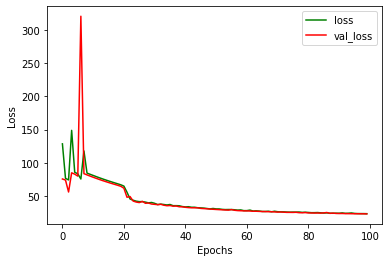

In [281]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [282]:
model.evaluate(x=x_test,y=y_test)
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 2ms/step - loss: 19.4845


In [283]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

17.721833817164104
